In [ ]:
#Neural Networks-Gas Turbine

In [3]:
#load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=bebd21394010db3d9d6104692217e2813785e0b0bcf5e50142c809b48ddbf7ec
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1


In [4]:
# Generating reproducible results from same code
tf.random.set_seed(14) 

In [5]:
raw = pd.read_csv("gas_turbines.csv")
raw.head() 
#TEY is the variable we should predict.

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
df = raw.copy() 
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [8]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


# Feature Analysis

 All features in the dataset can be used in model building. This is a Regression Problem.

# Train | Split dataset

In [9]:
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

A common mistake when configuring a neural network is to first normalize the data before splitting the data.

In [10]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [12]:
len(xtrain_scale)

10527

# Neural Network Modelling

Building the Model

In [13]:
# Create your first MLP in Keras
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# create model
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)
#At epoch 50, mse and mae just keeps oscillating back and forth

Epoch 1/100
48/48 [==============================] - 2s 17ms/step - loss: 0.0730 - mse: 0.0730 - mae: 0.2072 - val_loss: 0.0470 - val_mse: 0.0470 - val_mae: 0.1578
Epoch 2/100
48/48 [==============================] - 0s 10ms/step - loss: 0.0457 - mse: 0.0457 - mae: 0.1538 - val_loss: 0.0458 - val_mse: 0.0458 - val_mae: 0.1597
Epoch 3/100
48/48 [==============================] - 0s 10ms/step - loss: 0.0442 - mse: 0.0442 - mae: 0.1563 - val_loss: 0.0438 - val_mse: 0.0438 - val_mae: 0.1564
Epoch 4/100
48/48 [==============================] - 0s 10ms/step - loss: 0.0436 - mse: 0.0436 - mae: 0.1596 - val_loss: 0.0426 - val_mse: 0.0426 - val_mae: 0.1585
Epoch 5/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0418 - mse: 0.0418 - mae: 0.1572 - val_loss: 0.0419 - val_mse: 0.0419 - val_mae: 0.1593
Epoch 6/100
48/48 [==============================] - 0s 10ms/step - loss: 0.0413 - mse: 0.0413 - mae: 0.1583 - val_loss: 0.0423 - val_mse: 0.0423 - val_mae: 0.1587
Epoch 7/100
48/4

Epoch 51/100
48/48 [==============================] - 0s 10ms/step - loss: 0.0390 - mse: 0.0390 - mae: 0.1559 - val_loss: 0.0398 - val_mse: 0.0398 - val_mae: 0.1590
Epoch 52/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1576 - val_loss: 0.0393 - val_mse: 0.0393 - val_mae: 0.1564
Epoch 53/100
48/48 [==============================] - 0s 10ms/step - loss: 0.0386 - mse: 0.0386 - mae: 0.1555 - val_loss: 0.0393 - val_mse: 0.0393 - val_mae: 0.1574
Epoch 54/100
48/48 [==============================] - 0s 10ms/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1580 - val_loss: 0.0400 - val_mse: 0.0400 - val_mae: 0.1606
Epoch 55/100
48/48 [==============================] - 1s 10ms/step - loss: 0.0390 - mse: 0.0390 - mae: 0.1575 - val_loss: 0.0390 - val_mse: 0.0390 - val_mae: 0.1572
Epoch 56/100
48/48 [==============================] - 0s 10ms/step - loss: 0.0387 - mse: 0.0387 - mae: 0.1564 - val_loss: 0.0406 - val_mse: 0.0406 - val_mae: 0.1610
Epoch 57/1

In [15]:
model1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12,653
Trainable params: 12,653
Non-trainable params: 0
_________________________________________________________________


# Model Evaluation

In [17]:
y_predict = model1.predict(xtest_scale)

141/141 [==============================] - 0s 3ms/step


In [18]:
print(hist1.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [20]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.037986,0.037986,0.153483,0.039625,0.039625,0.157257,95
96,0.037961,0.037961,0.153933,0.040350,0.040350,0.159678,96
97,0.038407,0.038407,0.154264,0.039460,0.039460,0.158639,97
98,0.038236,0.038236,0.154544,0.039362,0.039362,0.158231,98
99,0.038515,0.038515,0.155471,0.040178,0.040178,0.159947,99


# Visualize Training History

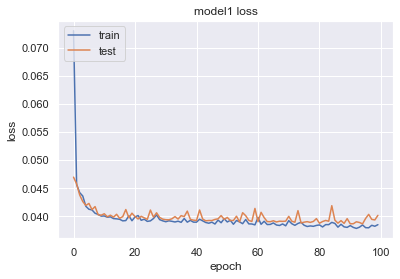

In [23]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

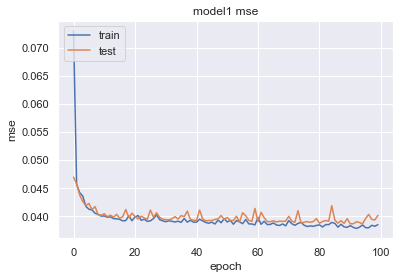

In [25]:
# summarize history for loss
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 